In [1]:
import os

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from tqdm import tqdm

import numpy as np

In [2]:
dataset_path = "../datasets/google-drawings/"
files = [f for f in os.listdir("../datasets/google-drawings/") if ".npy" in f]
n_files = len(files)

full_numpy_bitmap_basket.npy


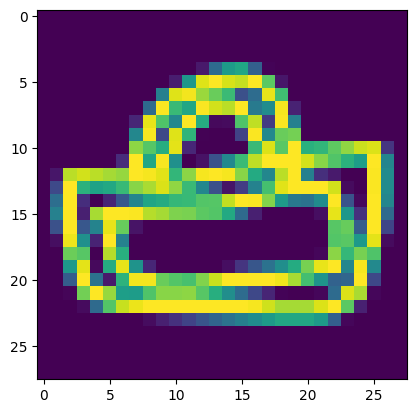

In [3]:
def load_batch(BS, train=True):
    
    batch = torch.zeros((BS, 1, 28, 28))
    labels = torch.zeros(BS).type(torch.uint8)

    file_indices = np.random.randint(0, n_files, BS)
    batch_indices = np.random.randint(0, 1000, BS)
    
    for i, (fi, bi) in enumerate(zip(file_indices, batch_indices)):
        item = np.load(dataset_path+files[fi])[bi]
        batch[i] = torch.from_numpy(item).type(torch.float).reshape(28,28)
        labels[i] = torch.tensor(fi)
        
    return batch, labels

x, y = load_batch(5)

plt.imshow(x[0].squeeze(dim=0))
print(files[y[0]])

In [40]:
class Residual(nn.Module):
    def __init__(self, inf1, outf1, inf2, outf2):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(inf1, outf1),
            nn.ReLU(),
            nn.Linear(inf2, outf2)
        )
        self.relu = nn.ReLU()
    def forward(self, x):
        y = self.layer_stack(x)
        y += x
        y = self.relu(y)
        return y

class MiniResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            Residual(784, 1024, 1024, 784),
            Residual(784, 1024, 1024, 784),
            nn.Linear(784, 128),
            nn.LogSoftmax(dim=1)
        )      
    def forward(self, x):
        return self.layer_stack(x)

device = torch.device("mps")
model = MiniResNet().to(device)

losses = []
accs = []

In [50]:
N_EPOCHS = 5
BS = 64
N_SAMPLES = n_files * 1000
N_BATCHES = int(N_SAMPLES/BS)

LR = 0.00001
MOM = 0.0

criterion = nn.NLLLoss()
optim = torch.optim.SGD(params=model.parameters(), lr=LR)

losses = []
accs = []

for n_epoch in tqdm(range(N_EPOCHS)):
    
    for n_batch in range(N_BATCHES):
        
        optim.zero_grad()
        
        batch, labels = load_batch(BS)
        batch = batch.to(device)
        labels = labels
        
        preds = model(batch)
        
        loss = criterion(preds, labels.to(device))
        
        loss.backward()
        optim.step()
        
        loss_a = loss.detach().cpu().sum().item()/BS
        losses.append(loss_a)    
        acc = (preds.argmax(dim=1).detach().cpu()==labels).sum().item()/BS
        accs.append(acc)
        
        if n_batch % 25 == 0: 
            print(loss_a, acc)       

  0%|                                                        | 0/5 [00:00<?, ?it/s]

0.03779168426990509 0.40625
0.03343893215060234 0.484375
0.03200038895010948 0.453125
0.03117036446928978 0.484375
0.0310202743858099 0.484375
0.03318513557314873 0.484375
0.02903314121067524 0.53125
0.031122134998440742 0.46875
0.03741111606359482 0.453125
0.03490985929965973 0.375
0.0313539020717144 0.46875
0.03225360065698624 0.5
0.034591399133205414 0.546875
0.033520326018333435 0.53125
0.024158122017979622 0.53125
0.034202221781015396 0.4375
0.033357977867126465 0.515625
0.03111151233315468 0.484375
0.03445299714803696 0.5
0.03509319946169853 0.4375
0.02968469262123108 0.5625
0.03522898256778717 0.484375
0.02883915975689888 0.609375
0.032215721905231476 0.484375
0.029615748673677444 0.578125
0.038948141038417816 0.328125
0.02609555795788765 0.609375
0.029600612819194794 0.515625
0.03255632892251015 0.484375
0.03592066466808319 0.53125
0.030896304175257683 0.5
0.0404965877532959 0.46875
0.03745044767856598 0.40625
0.03497396409511566 0.421875
0.02788061648607254 0.5625
0.0345845818

 20%|█████████▌                                      | 1/5 [00:28<01:54, 28.53s/it]

0.03160417824983597 0.546875
0.033250898122787476 0.484375
0.036798764020204544 0.421875
0.03283075988292694 0.4375
0.03856974467635155 0.40625
0.027952661737799644 0.59375
0.02924993634223938 0.46875
0.033303216099739075 0.453125
0.03841758891940117 0.40625
0.031576745212078094 0.484375
0.03372576832771301 0.46875
0.0304412804543972 0.4375
0.037118736654520035 0.4375
0.030654406175017357 0.5625
0.034141939133405685 0.421875
0.03427532687783241 0.515625
0.031925562769174576 0.515625
0.032783232629299164 0.484375
0.03048144094645977 0.59375
0.030255671590566635 0.546875
0.0317523255944252 0.546875
0.04033216834068298 0.484375
0.03779188543558121 0.390625
0.028283419087529182 0.5625
0.03607029467821121 0.46875
0.028932979330420494 0.53125
0.02557012438774109 0.5625
0.03279895707964897 0.453125
0.033771343529224396 0.515625
0.03479628264904022 0.4375
0.03577519208192825 0.46875
0.03318249434232712 0.46875
0.03808704763650894 0.453125
0.03005986660718918 0.546875
0.028211819007992744 0.578

 40%|███████████████████▏                            | 2/5 [00:56<01:25, 28.42s/it]

0.03554758056998253 0.46875
0.023824680596590042 0.609375
0.031063765287399292 0.515625
0.03031221218407154 0.453125
0.03585948795080185 0.53125
0.036144692450761795 0.515625
0.03511316329240799 0.4375
0.03001256287097931 0.546875
0.02860156074166298 0.53125


 40%|███████████████████▏                            | 2/5 [00:59<01:29, 29.93s/it]


KeyboardInterrupt: 

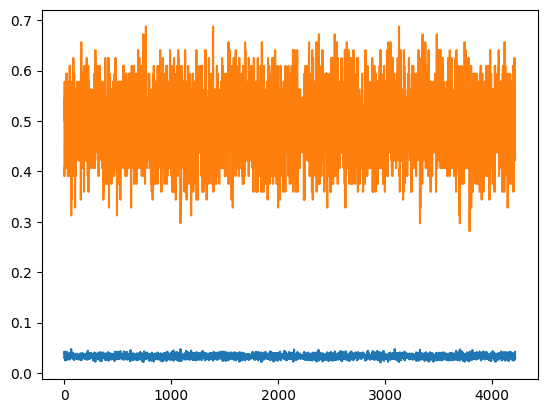

In [51]:
plt.plot(losses)
plt.plot(accs)